In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()

### Movies dataset

In [2]:
# Load datasets
def read_df(path):
    return pd.read_csv(path, sep="\t", compression="gzip", na_values="\\N")

ratings = read_df("title.ratings.tsv.gz")
basics = read_df("title.basics.tsv.gz")
df_movies = pd.merge(ratings, basics, on="tconst")
df_movies.head()

C:\Users\omidk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1869,short,Carmencita,Carmencita,0.0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,5.9,247,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,6.5,1644,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,5.8,159,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12,"Animation,Short"
4,tt0000005,6.2,2470,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1,"Comedy,Short"


Here we are interested in the average rating and number of votes of the movies and also their genres and year they came out.

In [3]:
df_movies.describe()

,averageRating,numVotes,isAdult,startYear,endYear
count,1.231813e+06,1.231813e+06,1.231813e+06,1.231593e+06,37347.000000
mean,6.920744e+00,9.988873e+02,2.076939e-02,2.001127e+03,2004.553297
std,1.392501e+00,1.672194e+04,2.573412e+00,2.135230e+01,15.655102
min,1.000000e+00,5.000000e+00,0.000000e+00,1.874000e+03,1933.000000
25%,6.200000e+00,1.100000e+01,0.000000e+00,1.994000e+03,1997.000000
50%,7.100000e+00,2.400000e+01,0.000000e+00,2.009000e+03,2009.000000
75%,7.900000e+00,9.400000e+01,0.000000e+00,2.016000e+03,2017.000000
max,1.000000e+01,2.569780e+06,2.020000e+03,2.022000e+03,2024.000000


In [4]:
df_movies["logNumVotes"] = np.log(df_movies["numVotes"])

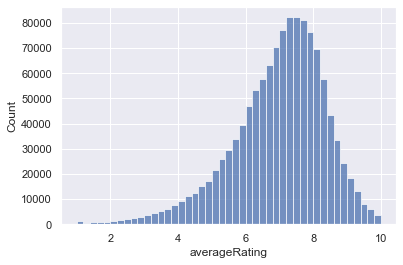

In [5]:
# How are the ratings distributed
sns.histplot(data=df_movies, x="averageRating", binwidth=0.20);

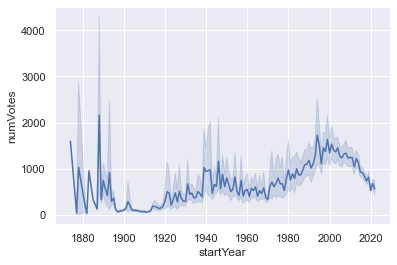

In [6]:
# Do newer movies receive more ratings ? 
sns.lineplot(data=df_movies, x="startYear", y="numVotes");

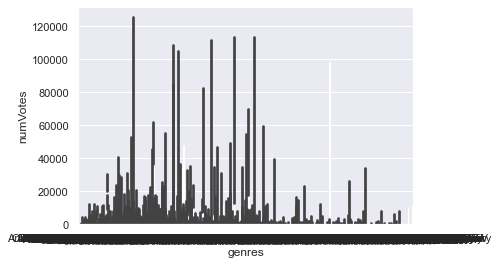

In [7]:
# What genres of movies receive more attention over time ?
# TODO: only keep n most relevant genres
sns.barplot(data=df_movies.explode("genres"), x="genres", y="numVotes");

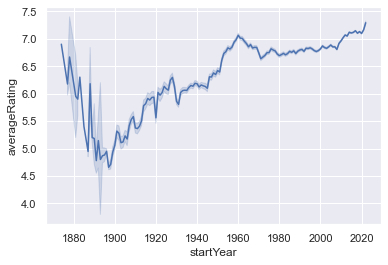

In [8]:
sns.lineplot(data=df_movies, x="startYear", y="averageRating");
# Important question: the increase of the average rating is due to real
# improvement of the movies or are we biased to give a better rating to
# what is more recent 

### Actors dataset

In [9]:
actors = read_df("name.basics.tsv.gz")
actors.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0072308,tt0053137"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0037382,tt0071877,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,music_department","tt0057345,tt0056404,tt0049189,tt0054452"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,soundtrack,writer","tt0080455,tt0078723,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0060827,tt0083922,tt0050986"


Here we are mostly interested in the actors, and eventually directors. The attribute "knownForTitle" will be used to link the actors together.